In [ ]:
from google.colab import files

In [ ]:
files.upload()

# Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the dataset

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# **Multinomial Naive Bayes Model**



# Data Cleaning

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  stop_words = stopwords.words('english')
  stop_words.remove('not') # "not" can change the sentiment of the review so we should include "not" in our review by removing "not" from the stop_words not will be included in our review so our model accuracy will increase
  review = [ps.stem(word) for word in review if not word in set(stop_words)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 205)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Spliting the dataset into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=46)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 205), (200, 205), (800,), (200,))

# Training the MultinomialNaiveBayes model on the Training set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Defining the model
classifier = MultinomialNB()

# fitting the model
classifier.fit(X_train, y_train)

# making predictions on the test set
y_pred = classifier.predict(X_test)

# making prediction on the training set
y_pred_train = classifier.predict(X_train)

# HyperParameter Tuning

In [ ]:
best_model = None
alpha = 0
best_test_accuracy = 0
for i in [float(x) / 10 for x in range(1, 11)]:
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred) * 100
  if test_accuracy > best_test_accuracy:
    best_test_accuracy = test_accuracy
    best_model = classifier
  print("for alpha = {} model accuracy is {:.2f}%".format(i, test_accuracy))

for alpha = 0.1 model accuracy is 79.50%
for alpha = 0.2 model accuracy is 79.00%
for alpha = 0.3 model accuracy is 79.00%
for alpha = 0.4 model accuracy is 79.00%
for alpha = 0.5 model accuracy is 79.00%
for alpha = 0.6 model accuracy is 79.50%
for alpha = 0.7 model accuracy is 81.00%
for alpha = 0.8 model accuracy is 81.50%
for alpha = 0.9 model accuracy is 81.50%
for alpha = 1.0 model accuracy is 81.50%


# Making predictions on Test and Train set

In [ ]:
# making predictions on the training set by using best_model after hyper parameter tuning
y_pred_train = best_model.predict(X_train)

# making prediction on the testing set by using best_model after hyper parameter tuning
y_pred = best_model.predict(X_test)

# Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# confusion matrix of y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# confusion matrix of y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_pred_train)

# finding test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# finding train accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# finding precision score
precision = precision_score(y_test, y_pred)

# finding recall score
recall = recall_score(y_test, y_pred)
print("The confusion matrix of train set:\n", cm_train)
print("The confusion matrix of test set:\n", cm)
print("training accuracy: {:.2f}%:".format(train_accuracy*100))
print("testing accuracy: {:.2f}%:".format(test_accuracy*100))
print("precision score: {:.2f}%:".format(precision*100))
print("recall score: {:.2f}%".format(recall*100))

The confusion matrix of train set:
 [[353  53]
 [ 83 311]]
The confusion matrix of test set:
 [[77 17]
 [20 86]]
training accuracy: 83.00%:
testing accuracy: 81.50%:
precision score: 83.50%:
recall score: 81.13%


# Predicting Unseen data

In [ ]:
# predicting new unseen data
new_review = 'not that good'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = best_model.predict(new_X_test)
print(new_y_pred)

[0]


# visualization of confusion matrix

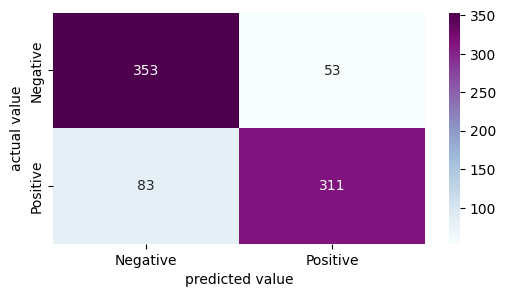

In [ ]:
# ploting the confusion matrix of training set
plt.figure(figsize = (6, 3))
sns.heatmap(cm_train, annot = True, cmap = "BuPu", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

Text(45.722222222222214, 0.5, 'actual value')

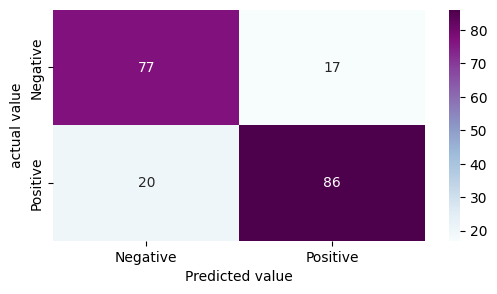

In [ ]:
# plotting the confusion matrix of test set
plt.figure(figsize= (6, 3))
sns.heatmap(cm, annot = True, cmap = "BuPu", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted value')
plt.ylabel('actual value')

# **K-NEAREST NEIGHBOR MODEL**


# CLEANING THE DATA

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  stop_words = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(stop_words)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating the bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 200)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Training the GAUSSIAN NAIVE BAYES model on Training set

In [ ]:
# importing modules
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
# defining model
classifier = GaussianNB()
k_folds = 5
CV = StratifiedKFold(n_splits=k_folds, shuffle = True, random_state = 42)
# initializing variables to store best model and its corresponding scores
best_model = None
best_test_accuracy = 0
best_train_accuracy = 0
X_train1, X_test1, y_train1, y_test1 = None, None, None, None

# perform cross-validation
for train_idx, test_idx in CV.split(X, y):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]
  # fit the model
  classifier.fit(X_train, y_train)

  # Making predictions and evaluating accuracy for both training and test data
  y_pred_test = classifier.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred_test)

  y_pred_train = classifier.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_pred_train)

  # check if this model has the best test accuracy so far
  if test_accuracy > best_test_accuracy:
    best_test_accuracy = test_accuracy
    best_train_accuracy = train_accuracy
    X_train1, X_test1, y_train1, y_test1 = X_train,X_test, y_train, y_test
    best_model = classifier
print(f"Training accuracy: {best_train_accuracy*100}%")
print(f"Testing accuracy: {best_test_accuracy*100}%")

Training accuracy: 72.5%
Testing accuracy: 72.5%


# Predictions on Training and test sets

In [ ]:
# prediction on train set
y_pred_train = best_model.predict(X_train)

# prediction on test set
y_pred_test = best_model.predict(X_test)

# Making the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix of y_test and y_pred_test
cm = confusion_matrix(y_test, y_pred_test)

# confusion matrix of y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_pred_train)

print("confusion matrix for training set: \n", cm_train)
print("confusion matrix for testing set: \n", cm)
print("Training accuracy:{:.2f}%".format(accuracy_score(y_train, y_pred_train) * 100))
print("Testing accuracy:{:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

confusion matrix for training set: 
 [[191 209]
 [ 11 389]]
confusion matrix for testing set: 
 [[52 48]
 [ 7 93]]
Training accuracy:72.50%
Testing accuracy:72.50%


# predicting new review

In [ ]:
# predicting new review
new_review = 'this dish is bad'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = best_model.predict(new_X_test)
print(new_y_pred)

[0]


# visualization

Text(45.722222222222214, 0.5, 'actual value')

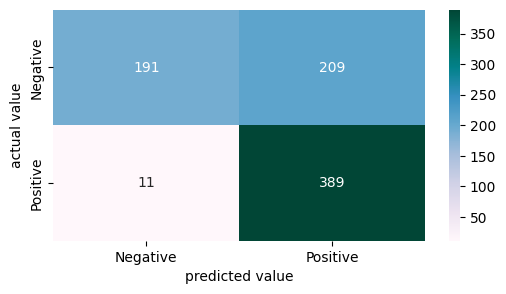

In [ ]:
# plotting confusion matrix of train data
plt.figure(figsize = (6, 3))
sns.heatmap(cm_train, annot = True, cmap = "PuBuGn", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')

Text(45.722222222222214, 0.5, 'actual value')

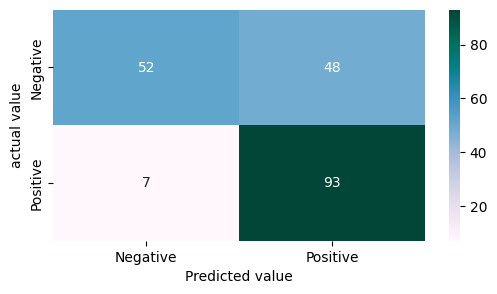

In [ ]:
# plotting confusion matrix of test data
plt.figure(figsize = (6, 3))
sns.heatmap(cm, annot = True, cmap = "PuBuGn", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted value')
plt.ylabel('actual value')

# **SUPPORT VECTOR CLASSIFIER**

# DATA CLEANING

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  stop_words = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(stop_words)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# CREATING THE BAG OF WORDS

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 200)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# SPLIT THE DATASET INTO TRAINING SET AND TESTING SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# TRAINING SVC MODEL ON TRAINING SET

In [ ]:
# Define the model
model = SVC()

# defining hyperparameters to tune
param_grid = {'C':[0.1, 1, 10], 'kernel':['linear', 'rbf']}

# perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# use the best model obtained from GridSearchCV
model = grid_search.best_estimator_

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Calculate the testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

# print the training and test accuracies
print(f"Training accuracy: {training_accuracy * 100:.2f}%")
print(f"Testing accuracy: {testing_accuracy * 100:.2f}%")
print(f"precision score: {precision * 100:.2f}%")
print(f"recall score: {recall * 100:.2f}%")

Training accuracy: 78.75%
Testing accuracy: 77.00%
precision score: 89.61%
recall score: 64.49%


# MAKING CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix of y_test and y_pred_test
cm = confusion_matrix(y_test, y_test_pred)

# confusion matrix of y_train and y_pred_train
cm_train = confusion_matrix(y_train, y_train_pred)

print("confusion matrix for training set: \n", cm_train)
print("confusion matrix for testing set: \n", cm)
print("Training accuracy:{:.2f}%".format(accuracy_score(y_train, y_train_pred)*100))
print("Testing accuracy:{:.2f}%".format(accuracy_score(y_test, y_test_pred)*100))

confusion matrix for training set: 
 [[368  39]
 [131 262]]
confusion matrix for testing set: 
 [[85  8]
 [38 69]]
Training accuracy:78.75%
Testing accuracy:77.00%


# PREDICTING NEW REVIEW

In [ ]:
# predicting new review
new_review = 'i love this place'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
print(new_y_pred)

[1]


# VISUALIZATION

Text(45.722222222222214, 0.5, 'actual value')

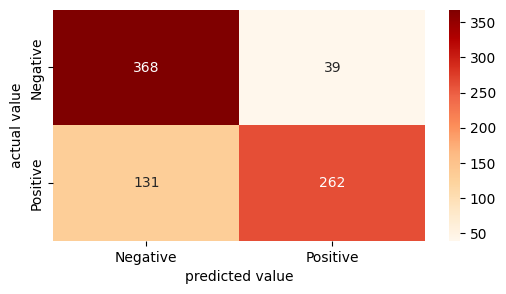

In [ ]:
# plotting confusion matrix of train data
plt.figure(figsize = (6, 3))
sns.heatmap(cm_train, annot = True, cmap = "OrRd", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('predicted value')
plt.ylabel('actual value')

Text(45.722222222222214, 0.5, 'actual value')

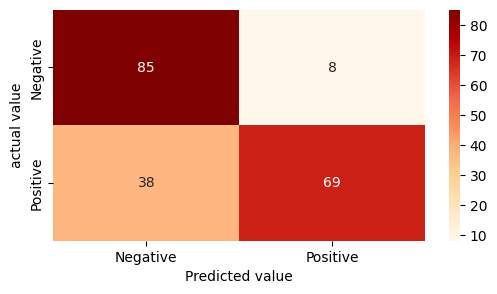

In [ ]:
# plotting confusion matrix of test data
plt.figure(figsize = (6, 3))
sns.heatmap(cm, annot = True, cmap = "OrRd", fmt = 'd', xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted value')
plt.ylabel('actual value')